In [1]:
import cv2
print("OpenCV (cv2) imported successfully.")

OpenCV (cv2) imported successfully.


In [2]:
import numpy as np
import os

# Create a dummy image (a simple colored rectangle)
# The image will be 100x200 pixels, 3 channels (BGR for OpenCV)
# A red rectangle on a blue background
image_height = 100
image_width = 200

dummy_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

# Blue background
dummy_image[:, :] = [255, 0, 0] # BGR format: Blue

# Add a red rectangle in the middle
dummy_image[25:75, 50:150] = [0, 0, 255] # BGR format: Red

image_filename = 'sample_image.jpg'

# Save the dummy image
cv2.imwrite(image_filename, dummy_image)

if os.path.exists(image_filename):
    print(f"Dummy image '{image_filename}' created successfully.")
else:
    print(f"Failed to create dummy image '{image_filename}'.")

Dummy image 'sample_image.jpg' created successfully.


In [5]:
import cv2

# 1. Initialize video capture from the default camera
cap = cv2.VideoCapture(0)

# 2. Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file.")
    exit()

print("Camera opened successfully.")

# 3. Retrieve video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"Frame Width: {frame_width}")
print(f"Frame Height: {frame_height}")
print(f"Frames Per Second (FPS): {fps}")

# 4. Define a video output filename
output_filename = 'output.avi'

# 5. Define the FourCC codec
# Using 'MJPG' for AVI. Note: Different codecs might be required for different file formats or OS.
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

# 6. Create a cv2.VideoWriter object
# The third argument, FPS, should be > 0. If cap.get(cv2.CAP_PROP_FPS) returns 0, a default value (e.g., 20.0) can be used.
if fps == 0:
    print("Warning: FPS from camera is 0. Using a default FPS of 20.0 for video writer.")
    out = cv2.VideoWriter(output_filename, fourcc, 20.0, (frame_width, frame_height))
else:
    out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))


if out.isOpened():
    print(f"Video writer initialized successfully for '{output_filename}'.")
else:
    print("Error: Could not initialize video writer.")

Error: Could not open video stream or file.
Camera opened successfully.
Frame Width: 0
Frame Height: 0
Frames Per Second (FPS): 0.0
Video writer initialized successfully for 'output.avi'.


In [1]:
import cv2
import os

# Define the image filename (from a previous step)
image_filename = 'sample_image.jpg'

# 1. Read the dummy image to get its properties
dummy_image = cv2.imread(image_filename)

# Check if image was loaded successfully
if dummy_image is None:
    print(f"Error: Could not load image '{image_filename}'. Please ensure it exists.")
    exit()

# 2. Retrieve image properties for video writer
frame_height, frame_width, _ = dummy_image.shape
# Since we are creating a video from a static image, we define a desired FPS
fps = 10.0 # Using a fixed FPS for the output video

print(f"Using image '{image_filename}' with dimensions: {frame_width}x{frame_height}")
print(f"Output video FPS set to: {fps}")

# 3. Define a video output filename
output_filename = 'output_from_image.avi'

# 4. Define the FourCC codec
# Using 'MJPG' for AVI. Ensure this codec is supported on the system.
fourcc = cv2.VideoWriter_fourcc(*'MJPG')

# 5. Create a cv2.VideoWriter object
out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))


if not out.isOpened():
    print("Error: Could not initialize video writer. Check codec and file path.")
    exit()

print(f"Video writer initialized successfully for '{output_filename}' using image dimensions.")

# 6. Write the image repeatedly to the video file for a short duration (e.g., 5 seconds)
num_frames_to_write = int(fps * 5) # Write for 5 seconds

for i in range(num_frames_to_write):
    out.write(dummy_image)

print(f"Successfully wrote {num_frames_to_write} frames to '{output_filename}'.")

# 7. Release the video writer
out.release()
print("Video writer released.")

# Verify the output file exists (optional)
if os.path.exists(output_filename):
    print(f"Output video '{output_filename}' created successfully.")
else:
    print(f"Failed to create output video '{output_filename}'.")


Using image 'sample_image.jpg' with dimensions: 200x100
Output video FPS set to: 10.0
Video writer initialized successfully for 'output_from_image.avi' using image dimensions.
Successfully wrote 50 frames to 'output_from_image.avi'.
Video writer released.
Output video 'output_from_image.avi' created successfully.


Successfully opened video file: 'output_from_image.avi'
Video dimensions: 200x100, FPS: 10.00
Displaying video frames (press Ctrl+C to stop if running locally with imshow, or wait for it to finish in Colab)...


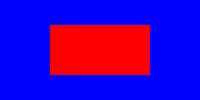

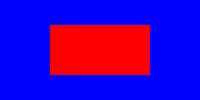

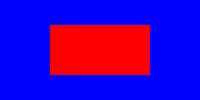

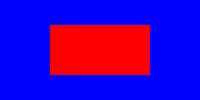

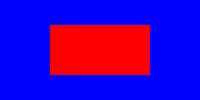

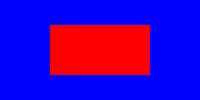

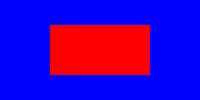

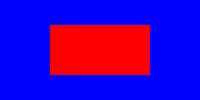

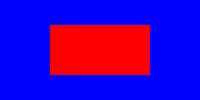

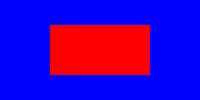

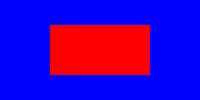

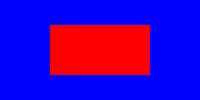

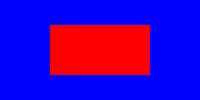

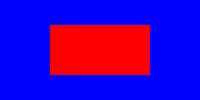

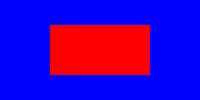

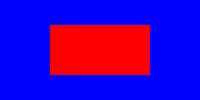

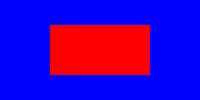

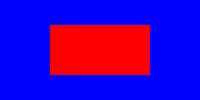

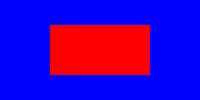

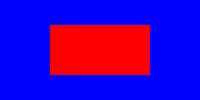

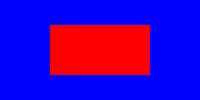

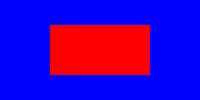

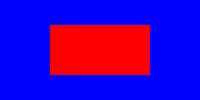

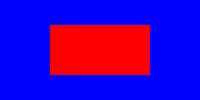

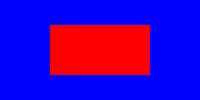

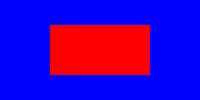

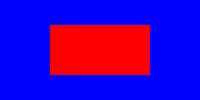

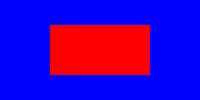

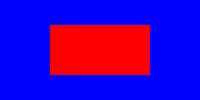

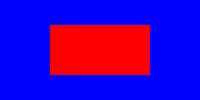

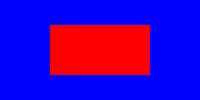

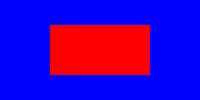

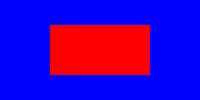

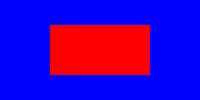

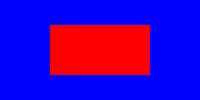

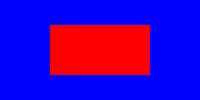

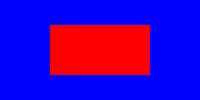

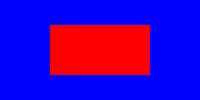

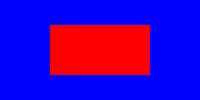

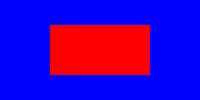

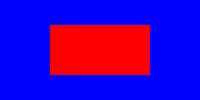

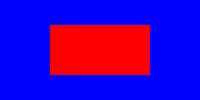

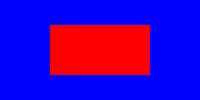

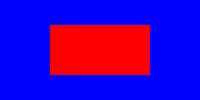

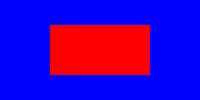

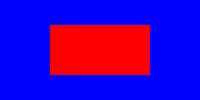

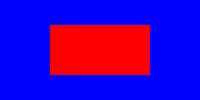

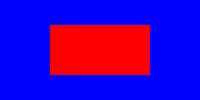

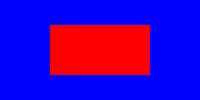

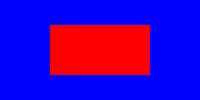

End of video stream or failed to read frame.
Video playback finished and capture object released.


In [2]:
import cv2
from google.colab.patches import cv2_imshow
import time # For a more reliable delay in Colab if needed, though cv2.waitKey is in instructions

# The output_filename variable is available from the previous step

# 1. Initialize a cv2.VideoCapture object with the path to the video file
cap = cv2.VideoCapture(output_filename)

# 2. Check if the video file was opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video file '{output_filename}'.")
    exit()

print(f"Successfully opened video file: '{output_filename}'")

# Get video properties (optional, but good for context)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

print(f"Video dimensions: {frame_width}x{frame_height}, FPS: {fps:.2f}")

print("Displaying video frames (press Ctrl+C to stop if running locally with imshow, or wait for it to finish in Colab)...")

# 3. Enter a loop to read and display frames
while True:
    ret, frame = cap.read() # Read a frame

    # If frame was not read successfully, break the loop
    if not ret:
        print("End of video stream or failed to read frame.")
        break

    # Display the frame
    cv2_imshow(frame)

    # Introduce a small delay. For cv2_imshow in Colab, a simple time.sleep is often more effective.
    # cv2.waitKey(delay_ms) is more common with actual cv2.imshow windows.
    time.sleep(0.1) # 100 milliseconds delay for a smooth playback

# 4. Release the cv2.VideoCapture object
cap.release()
print("Video playback finished and capture object released.")
